# CALIFORNIA HOUSING PRICES SIMPLILEARN TASKS:

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df=pd.read_csv("/home/siddharth/Desktop/housing.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
#dropping rows with missing values in total_bedrooms  
df=df.dropna(axis=0)

In [5]:
df_numeric= df.select_dtypes(float,int)

In [6]:
df_numeric.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


## 1) how ocean_proximity affects house value: 

In [7]:
df_categorical= df.select_dtypes(object)
df_categorical['median_house_value']=df['median_house_value']
df_categorical.head()

/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ocean_proximity,median_house_value
0,NEAR BAY,452600.0
1,NEAR BAY,358500.0
2,NEAR BAY,352100.0
3,NEAR BAY,341300.0
4,NEAR BAY,342200.0


In [8]:
df_categorical['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

<AxesSubplot:title={'center':'OCEAN PROXIMITY'}, xlabel='ocean_proximity'>

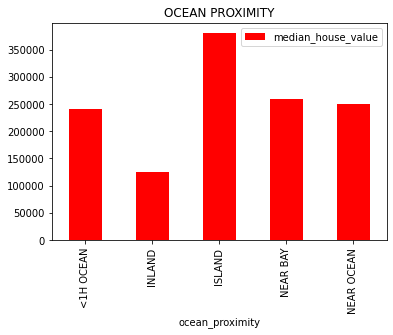

In [9]:
ocean_proximity = df_categorical.groupby(['ocean_proximity']).mean()
ocean_proximity.head()
ocean_proximity.plot.bar(color="red", title="OCEAN PROXIMITY")

,number_of_houses
ocean_proximity,
<1H OCEAN,9034
INLAND,6496
ISLAND,5
NEAR BAY,2270
NEAR OCEAN,2628


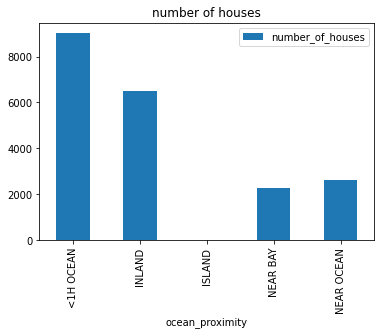

In [10]:
house_count= df_categorical.groupby(['ocean_proximity']).count()
house_count= house_count.rename({'median_house_value': 'number_of_houses'}, axis=1)
house_count.plot.bar(title= "number of houses")
house_count


    1) Island homes are most expensive and unique only 5 lstings were made. 
    2) Inland homes are the cheapest and second larget number of houses.
    3) Houses near bay (2270), near than ocean (2628) and less than one hour from ocean donot differ much in price.
  
    4) Largest number of listed houses were <1H from the ocean (9034)

## 2) checking correlation of numerical data.

In [11]:
print(df_numeric.corr())

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924616           -0.109357     0.045480   
latitude            -0.924616  1.000000            0.011899    -0.036667   
housing_median_age  -0.109357  0.011899            1.000000    -0.360628   
total_rooms          0.045480 -0.036667           -0.360628     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.100270 -0.108997           -0.295787     0.857281   
households           0.056513 -0.071774           -0.302768     0.918992   
median_income       -0.015550 -0.079626           -0.118278     0.197882   
median_house_value  -0.045398 -0.144638            0.106432     0.133294   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.100270    0.056513      -0.015550   
latitude                 -0.066983   -0.108997   -0.071774      -0.079626   
housing_

<AxesSubplot:>

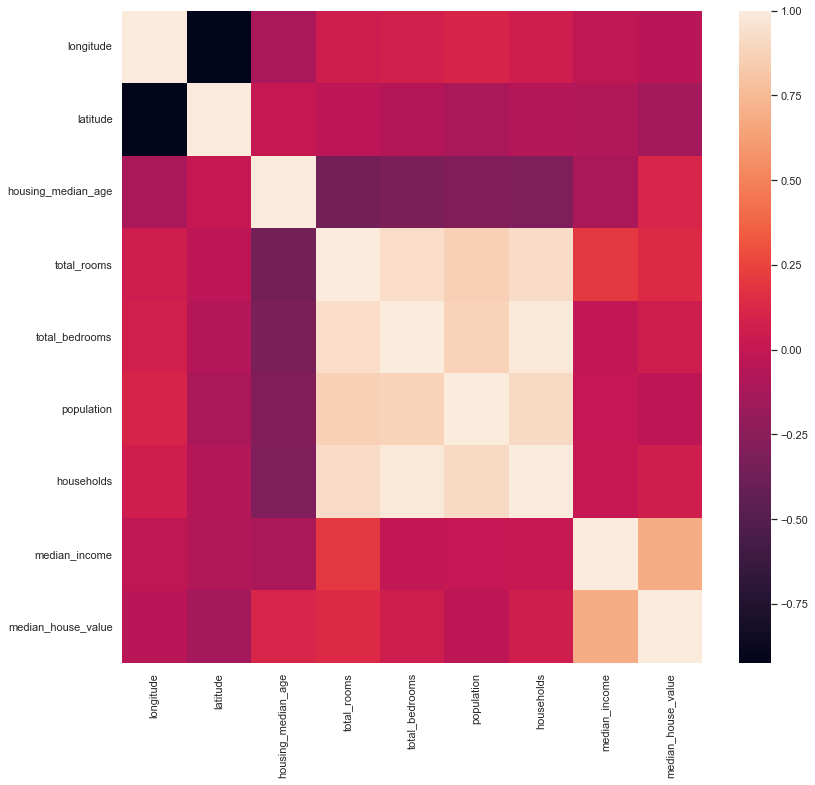

In [12]:
sns.set(rc={'figure.figsize':(13,12)})
sns.heatmap (df_numeric.corr())


total_rooms, total_ bedrooms , population, and house holds are correlated with eachother. 

## median_income effect on house prices and plotting the linear regressor:
    

In [13]:
x=df_numeric['median_income'] 
y=df_numeric["median_house_value"]

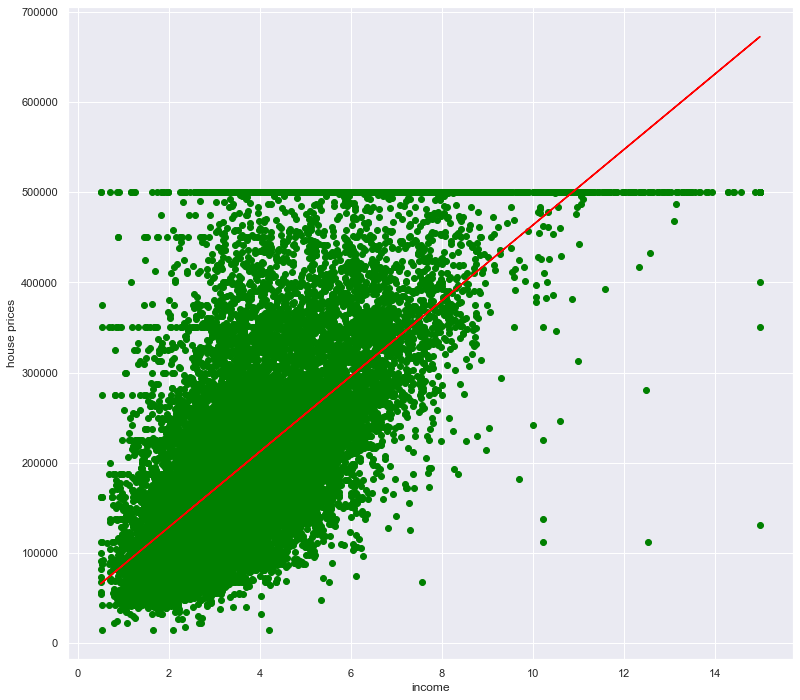

In [14]:
plt.xlabel("income")
plt.ylabel("house prices")
plt.plot(x,y,'o', color='green')
m,b= np.polyfit(x,y,1)
plt.plot(x, m*x + b, color= 'red')


## CHECKING FOR OUTLIERS :

In [15]:
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


<AxesSubplot:xlabel='median_house_value'>

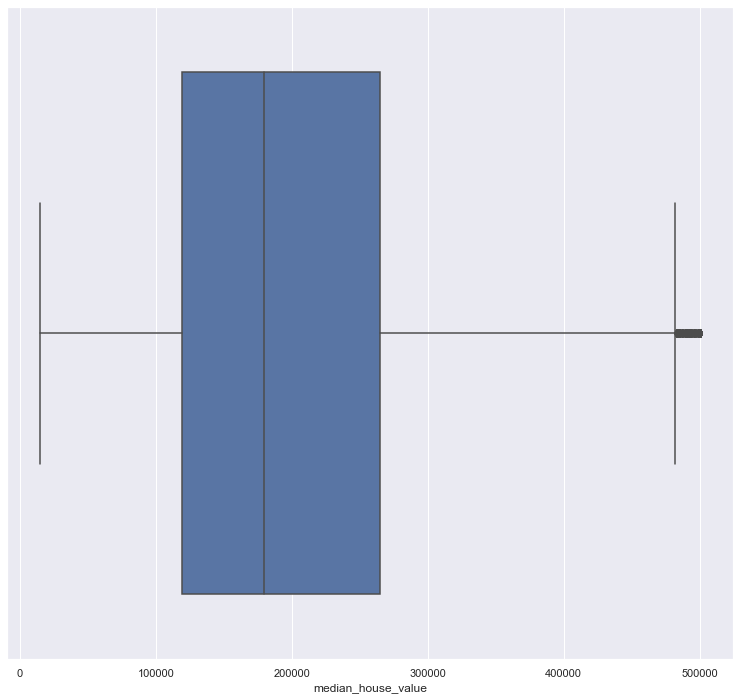

In [16]:
sns.boxplot(x= df['median_house_value'])


<AxesSubplot:xlabel='housing_median_age'>

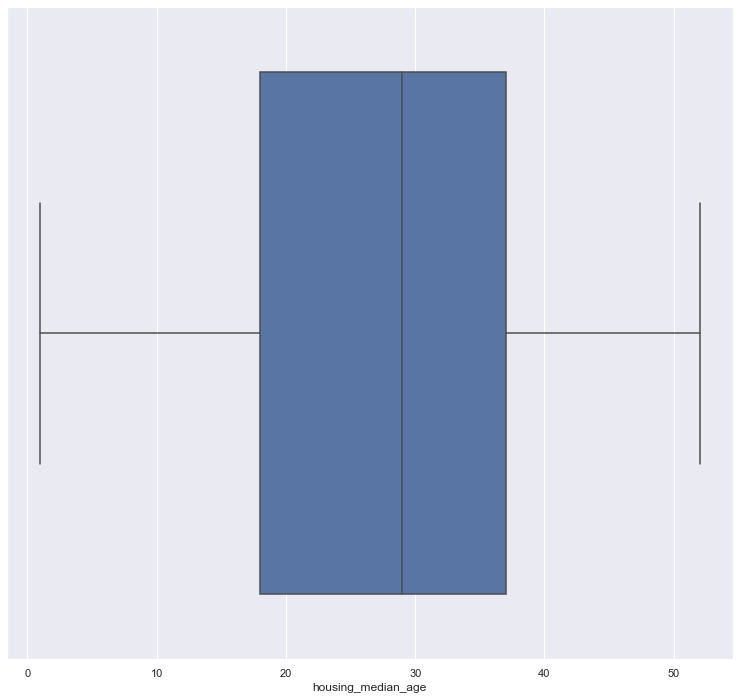

In [17]:

sns.boxplot(x= df['housing_median_age'])

<AxesSubplot:xlabel='total_rooms'>

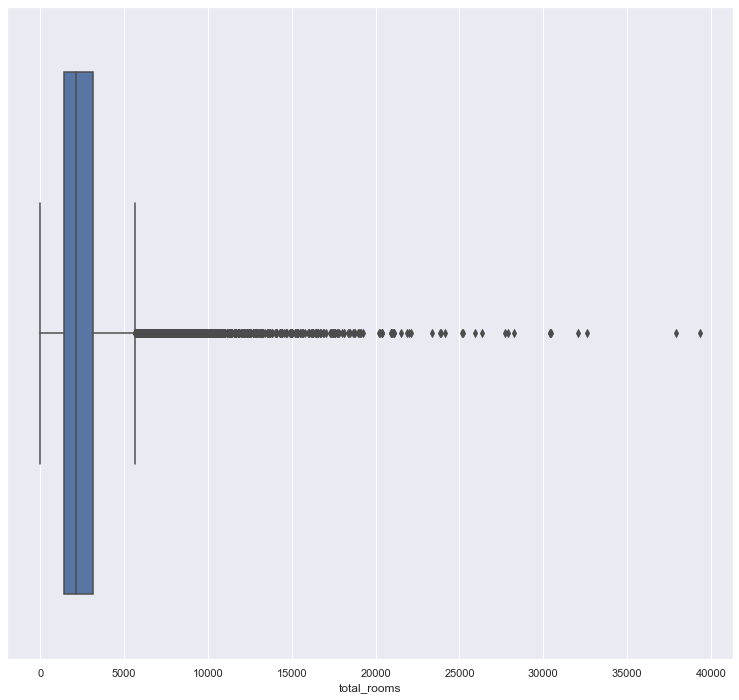

In [18]:
sns.boxplot(x= df["total_rooms"])

<AxesSubplot:xlabel='total_bedrooms'>

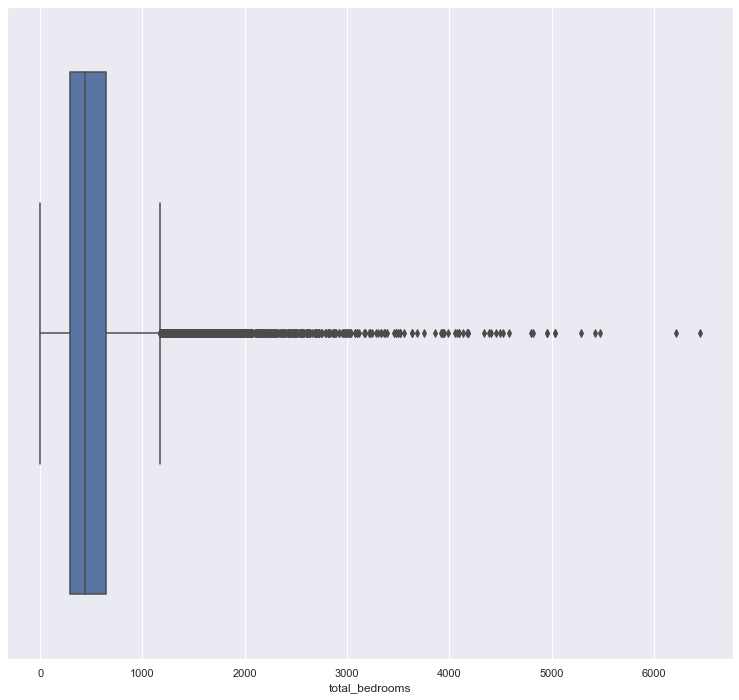

In [19]:
sns.boxplot(x=df["total_bedrooms"])


<AxesSubplot:xlabel='population'>

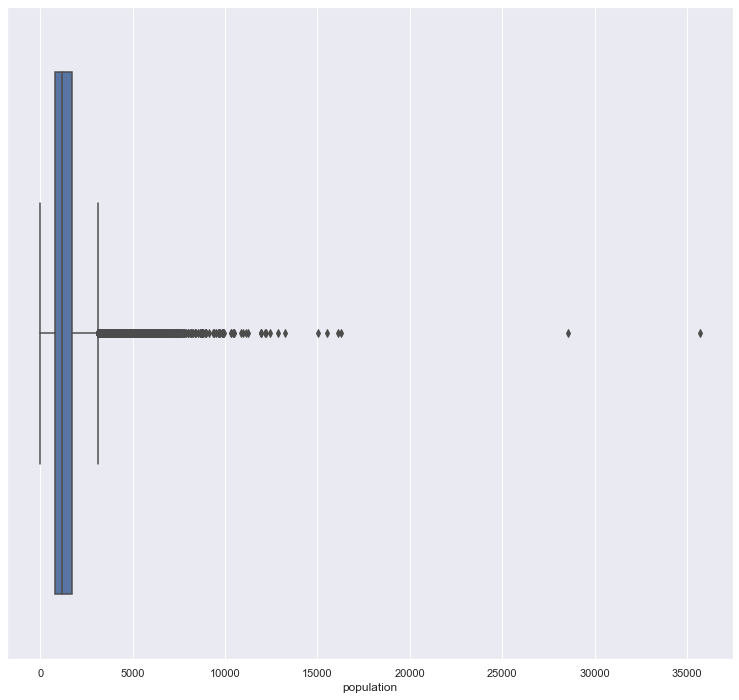

In [20]:
sns.boxplot(x=df["population"])


<AxesSubplot:xlabel='households'>

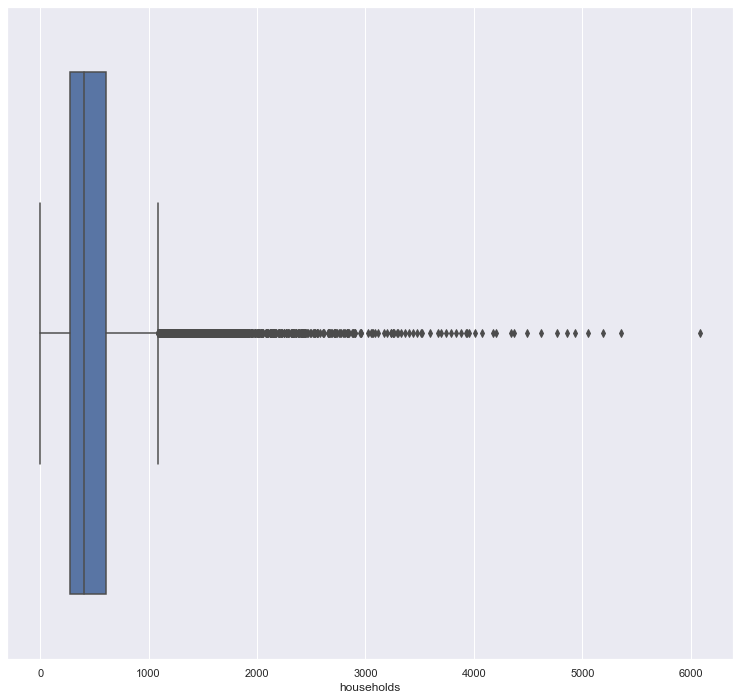

In [21]:
sns.boxplot(x=df["households"])


<AxesSubplot:xlabel='median_income'>

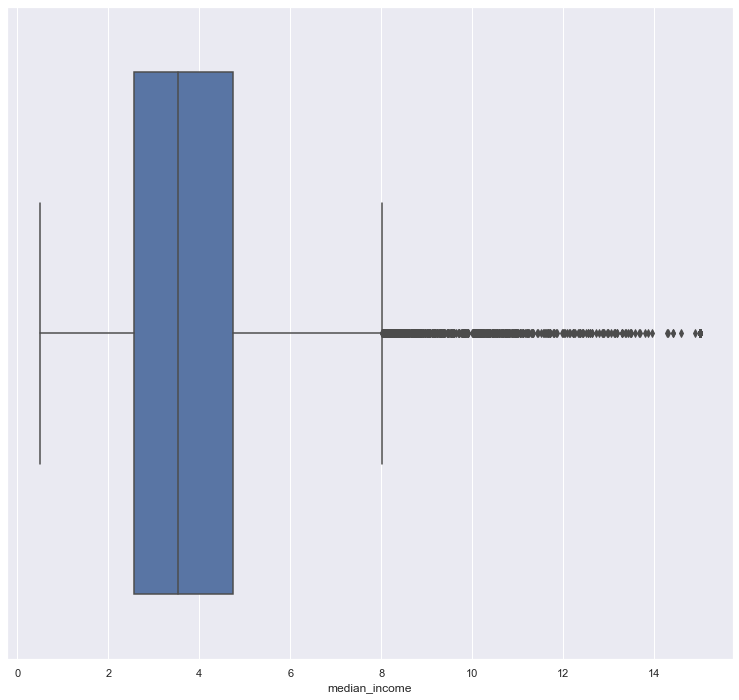

In [22]:
sns.boxplot(x=df["median_income"])


In [23]:
#LEAVING IN OUTLIERS AS REMOVING THIS MANY WILL LEAD TO LOSS OF MUCH DATA.


## ENCODING CATOGORICAL DATA AND STANDARDIZATION:

In [24]:
df2=pd.get_dummies(df)


In [25]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [26]:
x= df2.drop("median_house_value", axis=1)
y= df2["median_house_value"]

In [27]:
x= sc.fit_transform(x)

In [28]:
# Train test split :
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test= train_test_split(x,y)

## 1) LINEAR REGRESSION

In [30]:
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
lr=linear_model.LinearRegression()

In [32]:
lr.fit(x_train, y_train)

LinearRegression()

In [33]:
y_pred= lr.predict(x_test)

In [34]:
lr.score(x_test, y_test)

0.6384027956208997

In [35]:
print ("Mean Squared error:", mean_squared_error(y_test, y_pred))

Mean Squared error: 4810585616.572384


In [36]:
print ("Actual Value:", y_test.values[0])
print ("Predicted Value:",y_pred[0])

Actual Value: 95300.0
Predicted Value: 141394.5570325725


## 2) DECISION TREE REGRESSION:

In [37]:
from sklearn.tree import DecisionTreeRegressor
dtr= DecisionTreeRegressor()

In [38]:
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [39]:
dtr.score(x_test,y_test)

0.6637127203290423

In [40]:
y2_pred= dtr.predict(x_test)

In [41]:
print ("mean squared error=", mean_squared_error(y_test,y2_pred))

mean squared error= 4473869629.050891


## 3) Random Forest Regression :



In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
RF= RandomForestRegressor()

In [44]:
RF.fit(x_train, y_train)

RandomForestRegressor()

In [45]:
RF.score(x_test, y_test)

0.8206705549235639

In [46]:
y3_pred= RF.predict(x_test)

In [47]:
print("mean squared error=", mean_squared_error (y_test, y3_pred))

mean squared error= 2385747562.9379406
